# Question 6

In [1]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt

## Extract features from file

In [3]:
rel_path = 'twitter_data/'
tweets_data_path = 'tweets_#superbowl.txt'

tweets_title = []
tweets_location = []
tweets_file = open(rel_path+tweets_data_path, "rt",encoding = "UTF-8" )
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_title.append(tweet['title'])
        tweets_location .append(tweet['tweet']['user']['location'])
    except:
        continue
tweets_title

["I'm so excited the road to #SuperBowlXLIX will go through #SEATTLE! #GoHawks #Seahawks #PNW #12thman #NFCWestChamps http://t.co/CItrDrsWBn",
 'At http://t.co/Vd0RWOeAed -- #Seahawks #12thMAN #12 #SeahawkNation #SuperBowlBound #Superbowl #Repeat #GoHawks ... http://t.co/XSEFUKqEhN',
 'You been 12ed pass it on #SeahawkNation #LOB #SuperBowl2015 #RePete #BeastMode #GOHAWKS 😎 http://t.co/6maIxU7UF0',
 '27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyCats #SuperBowl2015 #halftime #Cats… http://t.co/1ON3JzJIIg',
 'Check out the cool event that  #budlight has planned for #superbowlXLIX\n#eventmarketer #experientialmarketing \n\nhttp://t.co/NTEFGKaTLp',
 '#SuperBowl2015 #Halftime 🏈🎉 http://t.co/qk8Wewdxi0',
 'Lenny Kravitz acompañará a Katy Perry en el #Halftime del #SuperBowl! http://t.co/WlqtUqc3PY',
 '#AlertaQRP NFL anuncia que Katy Perry estará acompañada por Lenny Kravitz en el medio tiempo del #SuperBowlXLIX http://t.co/A80izXsdph',
 'So this official OMG Super Bowl #prediction \n\nNew En

## Create Dataframe

In [4]:
tweets_locationdf = pd.DataFrame(tweets_location)
tweets_titledf = pd.DataFrame(tweets_title)
tweets_locationdf[0].value_counts()

                                  359264
New York                            7821
New York, NY                        7808
USA                                 7511
Los Angeles                         7188
Los Angeles, CA                     7041
Boston, MA                          5478
New York City                       5436
México                              5348
Chicago                             5181
NYC                                 5092
Chicago, IL                         4761
Washington, DC                      4639
London                              4307
Seattle, WA                         4079
Toronto                             3778
Canada                              3462
Boston                              3442
Texas                               3412
Atlanta, GA                         3199
California                          3156
Seattle                             3138
New Jersey                          2730
United States                       2605
Florida         

In [5]:
tweets_locationdf[0] == 'Seattle'

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13          True
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1348737    False
1348738    False
1348739    False
1348740    False
1348741    False
1348742    False
1348743    False
1348744    False
1348745    False
1348746    False
1348747    False
1348748    False
1348749    False
1348750    False
1348751    False
1348752    False
1348753    False
1348754    False
1348755    False
1348756    False
1348757    False
1348758    False
1348759    False
1348760    False
1348761    False
1348762    False
1348763    False
1348764    Fal

## Partition based on Location

In [6]:
Washington = []
Washington = tweets_titledf[0][tweets_locationdf[0] == 'Seattle']
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'Washington, DC'])
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'Seattle, WA'])
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'WA'])
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'Washington'])
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'Seattle, Washington'])
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'Kirkland, WA'])
Washington = Washington.append(tweets_titledf[0][tweets_locationdf[0] == 'Kirkland, Washington'])

In [7]:
len(Washington)

13451

In [8]:
Massachusetts = []
Massachusetts = tweets_titledf[0][tweets_locationdf[0] == 'Boston']
Massachusetts = Massachusetts.append(tweets_titledf[0][tweets_locationdf[0] == 'Worcester'])
Massachusetts = Massachusetts.append(tweets_titledf[0][tweets_locationdf[0] == 'Boston, MA'])
Massachusetts = Massachusetts.append(tweets_titledf[0][tweets_locationdf[0] == 'MA'])
Massachusetts = Massachusetts.append(tweets_titledf[0][tweets_locationdf[0] == 'Massachusetts'])
len(Massachusetts)

10515

In [9]:

Data = Washington.append(Massachusetts)
len(Data)

23966

In [10]:
target_w = [0]* len(Washington)
target_m = [1]* len(Massachusetts)
new_target = target_w + target_m
print(len(new_target))

23966


In [13]:
#header files
import re
import math
import string
import operator
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import sklearn.linear_model as sk
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing, cross_validation
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.discrete.discrete_model import Logit
from nltk import SnowballStemmer
from collections import Counter
from collections import defaultdict

C:\Users\cmuth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## TF-IDF

In [15]:
def stemming_tokenizer(text):
    stemmer = SnowballStemmer("english")
    interim = text 
    interim = "".join([a for a in interim if a not in set (string.punctuation)])
    interim = re.sub('[,.-:/()?{}*$#&]',' ',interim)
    interim = "".join(b for b in interim if ord(b) < 128)
    words = interim.split()
    stemmed = [stemmer.stem(item) for item in words]
    return stemmed
final_vect = CountVectorizer(analyzer = 'word' , tokenizer = stemming_tokenizer,stop_words = 'english',min_df = 2)
final_counts = final_vect.fit_transform(Data)
print("Dimensions of Numerical feature vector: "+ str(final_counts.shape))
print ("Number of terms Extracted: " + str(final_counts.shape[1]))

#TFIDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(final_counts)
print("Dimensions of TF-IDF vector: "+ str(X_train_tfidf.shape))

Dimensions of Numerical feature vector: (23966, 8754)
Number of terms Extracted: 8754
Dimensions of TF-IDF vector: (23966, 8754)


## SVD

In [16]:
#LSI
svd = TruncatedSVD(n_components=50, random_state=42)
transformed_tfidf = svd.fit_transform(X_train_tfidf)
print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
Min_Max_Scaler = MinMaxScaler()
scaled_lsi = Min_Max_Scaler.fit_transform(transformed_tfidf)

Dimensions of TF-IDF vector after LSI: (23966, 50)


In [17]:
#helper functions
def all_metrics(true, predicted,classes,title):
    print("==========="+title+"===========")
    print(metrics.classification_report(true, predicted,target_names=classes))
    print("accuracy: " + str(np.mean(predicted == true)))
    print("Confusion Matrix")
    print(metrics.confusion_matrix(true, predicted))
    return 1

def roc(true, predicted):
    fpr, tpr, thresholds = metrics.roc_curve(true, predicted)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return 1

In [18]:
bclasses = ['Washington', 'Massachusetts']

## SVM

===========SVM===========
               precision    recall  f1-score   support

   Washington       0.70      0.91      0.79     13451
Massachusetts       0.81      0.51      0.62     10515

  avg / total       0.75      0.73      0.72     23966

accuracy: 0.73228740716
Confusion Matrix
[[12221  1230]
 [ 5186  5329]]


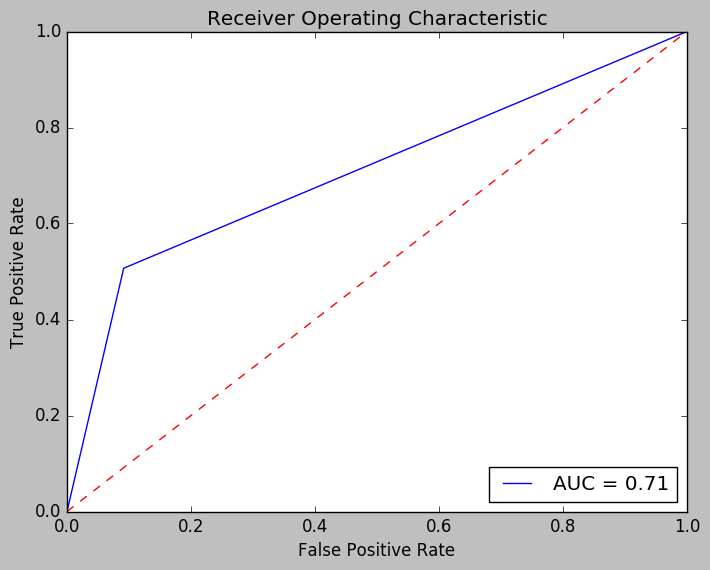

1

In [19]:
#SVM
lsvm_clf = svm.LinearSVC(dual = False, random_state = 42)
lsvm_clf.fit(scaled_lsi, new_target)
lsvm_predicted = lsvm_clf.predict(scaled_lsi)
all_metrics(new_target,lsvm_predicted,bclasses,"SVM")
roc(new_target,lsvm_predicted)

## SOFT MARGIN SVM

In [20]:
### Part F: Soft Margin SVM ###
accuracies = []
predictions = dict()
gamma_values = [10 ** i for i in range(-3,4)]

for value in gamma_values:
    soft_margin_SVM = svm.SVC(C=value, kernel='linear').fit(scaled_lsi, new_target)
    scores = cross_validation.cross_val_score(soft_margin_SVM, scaled_lsi,
                                new_target, cv=5, scoring='accuracy')
    accuracies.append(np.average(scores))

best_gamma_value = gamma_values[accuracies.index(max(accuracies))]



Best Gamma Value: 100
===========soft_margin_SVM===========
               precision    recall  f1-score   support

   Washington       0.69      0.93      0.79     13451
Massachusetts       0.84      0.45      0.59     10515

  avg / total       0.75      0.72      0.70     23966

accuracy: 0.722773929734
Confusion Matrix
[[12556   895]
 [ 5749  4766]]


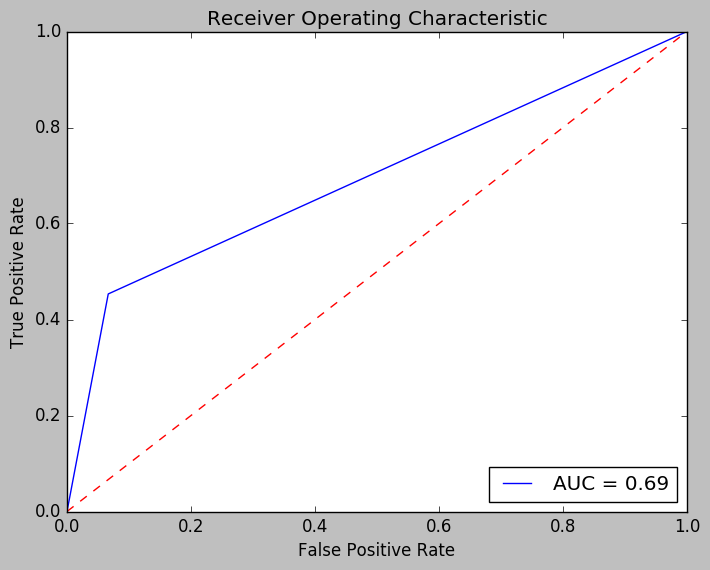

1

In [21]:
soft_margin_SVM = svm.SVC(C=best_gamma_value, kernel='linear').fit(scaled_lsi, new_target)
predicted_soft_svm = soft_margin_SVM.predict(scaled_lsi)
accuracy_soft_svm = np.mean(predicted_soft_svm == new_target)

print ("Best Gamma Value: " + str(gamma_values[accuracies.index(max(accuracies))]))
all_metrics(new_target,predicted_soft_svm,bclasses,"soft_margin_SVM")
roc(new_target,predicted_soft_svm)

## UNREGULARIZED LOGISTIC REGRESSION

===========Logistic Regularization(Unregularized)===========
               precision    recall  f1-score   support

   Washington       0.70      0.91      0.79     13451
Massachusetts       0.81      0.51      0.62     10515

  avg / total       0.75      0.73      0.72     23966

accuracy: 0.731327714262
Confusion Matrix
[[12201  1250]
 [ 5189  5326]]


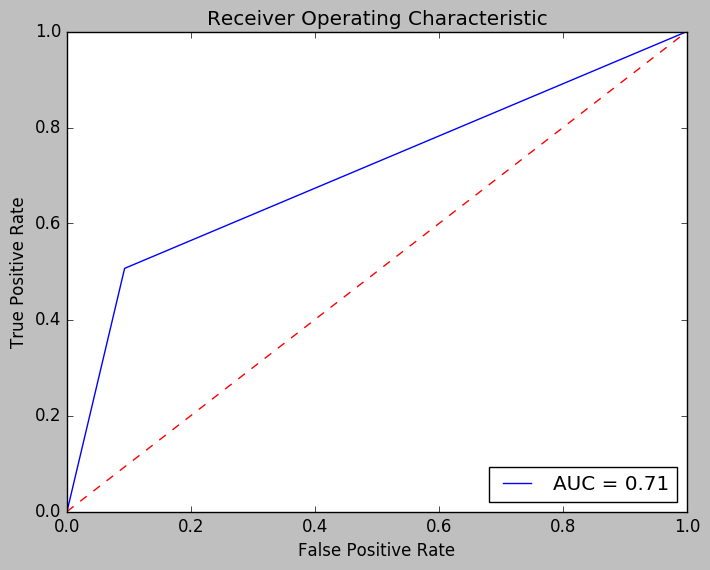

1

In [23]:
#Logistic Regression (Unregularized) 
logit = sk.LogisticRegression().fit(scaled_lsi, new_target)
probabilities = logit.predict(scaled_lsi)
predicted_lr = (probabilities > 0.5).astype(int)
all_metrics(new_target,predicted_lr,bclasses,"Logistic Regularization(Unregularized)")
roc(new_target,predicted_lr)